# Objective

For this project, the movies and tv-shows of the past 3 decades will be analyzed.

## Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

## Read the data

In [40]:
df=pd.read_csv(r'/Users/anishachoudhury/Desktop/Projects/portfolio1/MovieCorrelation/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Cleaning data

### Find any missing data

In [41]:
for col in df.columns:
    missingVal= np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(missingVal*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


### Types of data

In [42]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Change data type for budget and gross

In [43]:
#float to int
df = df.fillna(0)
df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

### Order by revenue


In [44]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

### Drop any duplicates

In [45]:
df.drop_duplicates().head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0


# Visualisation

## Scatterplot: Budget vs Gross Revenue

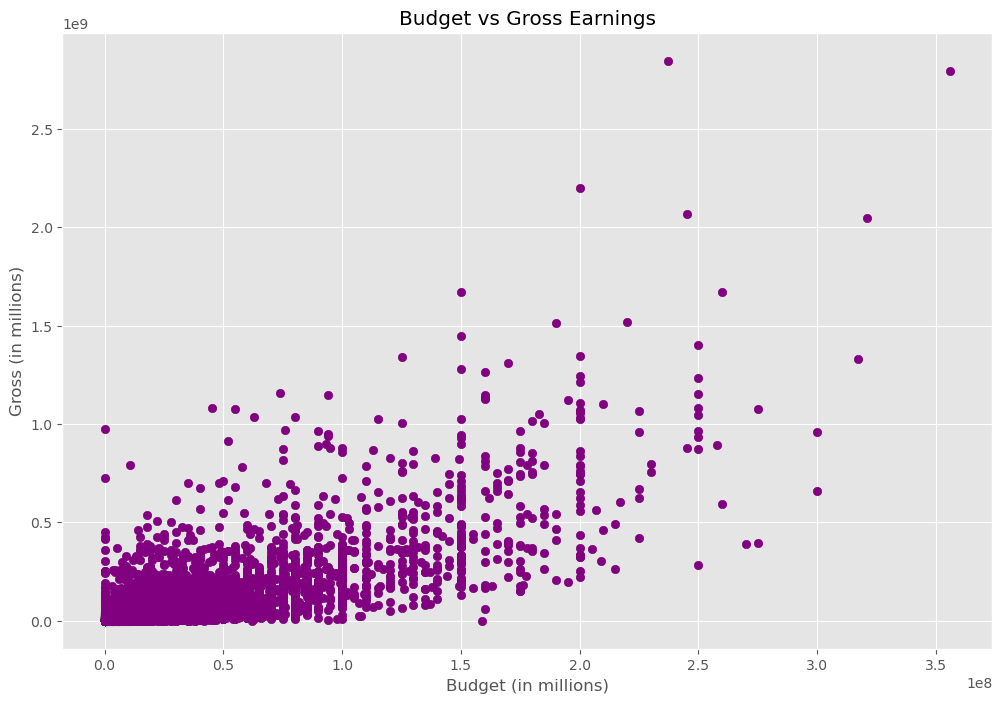

In [46]:
plt.scatter(x=df['budget'],y=df['gross'],color='purple')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget (in millions)')
plt.ylabel('Gross (in millions)')
plt.show()

## Regression Plot: budget vs gross

<Axes: xlabel='budget', ylabel='gross'>

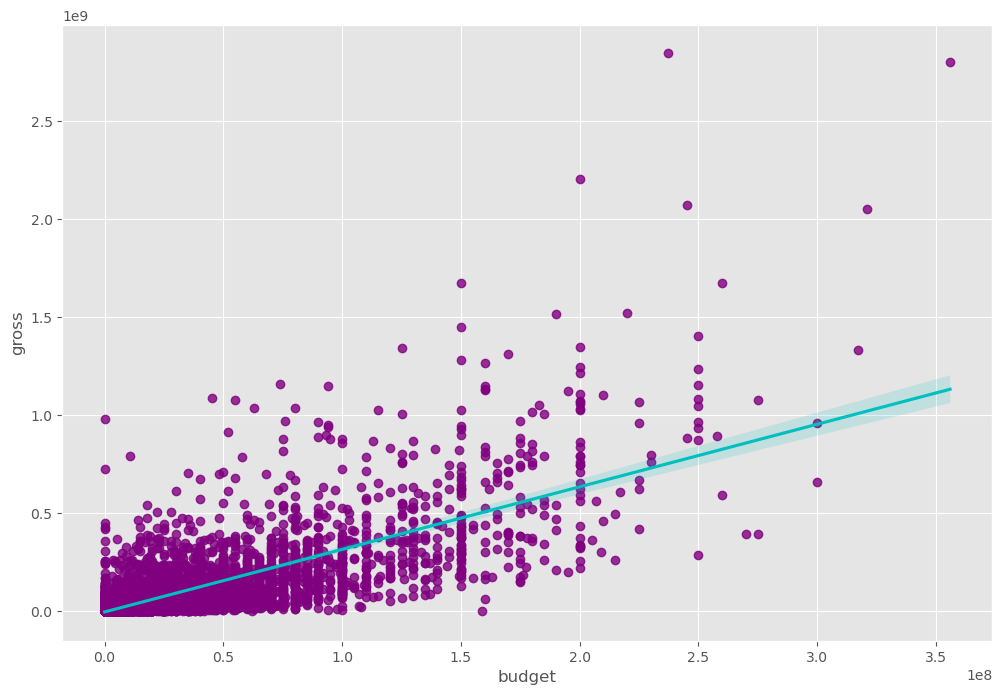

In [47]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'purple'},line_kws={'color':'c'})

### Correlation table:

In [48]:
df=df.select_dtypes(include=['number'])
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


## Visualising Corr

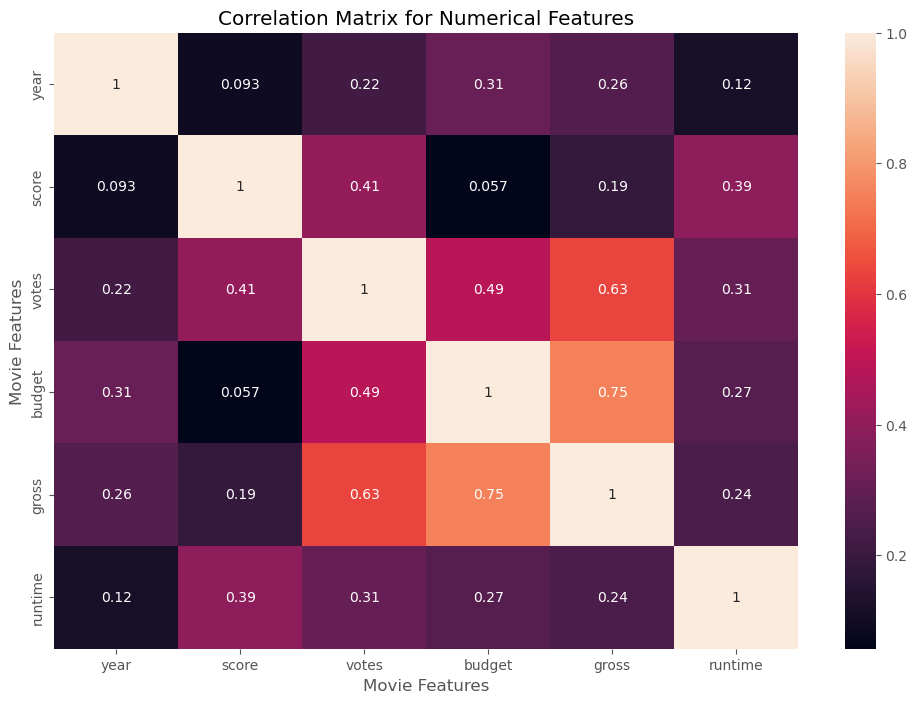

In [49]:
corr_matrix= df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True )
plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

## Visualise df with original dataset

In [50]:
cdf=pd.read_csv(r'/Users/anishachoudhury/Desktop/Projects/portfolio1/MovieCorrelation/movies.csv')
cdf=cdf.sort_values(by=['gross'], inplace=False, ascending=False)
cdf_numerical= cdf
for col_name in cdf_numerical.columns:
    if (cdf_numerical[col_name].dtype=='object'):
        cdf_numerical[col_name]=cdf_numerical[col_name].astype('category')
        cdf_numerical[col_name]=cdf_numerical[col_name].cat.codes
cdf_numerical.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


### Visualising corr

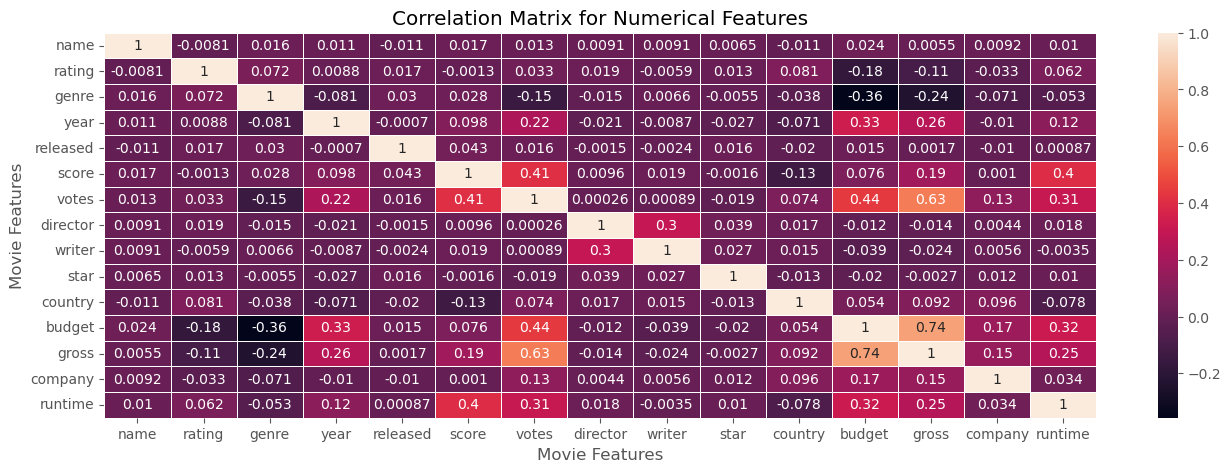

In [51]:
corr_matrix= cdf_numerical.corr(method='pearson')
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5 )
plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# Correlation between col

In [52]:
#filter and organise
corr_mat=cdf_numerical.corr()
corr_pairs=corr_mat.unstack()
#first 15
corr_pairs.head(15)

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
      score       0.017097
      votes       0.013088
      director    0.009079
      writer      0.009081
      star        0.006472
      country    -0.010737
      budget      0.023970
      gross       0.005533
      company     0.009211
      runtime     0.010392
dtype: float64

In [53]:
sorted_pairs=corr_pairs.sort_values()
#first 15
sorted_pairs.head(15)


budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
budget   rating    -0.176002
genre    votes     -0.145307
votes    genre     -0.145307
score    country   -0.133348
country  score     -0.133348
gross    rating    -0.107339
rating   gross     -0.107339
year     genre     -0.081261
genre    year      -0.081261
country  runtime   -0.078412
dtype: float64

In [54]:
high_corr=sorted_pairs[(sorted_pairs>0.5)]
high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

# Additional scatterplot

## scatterplot with votes vs gross revenue

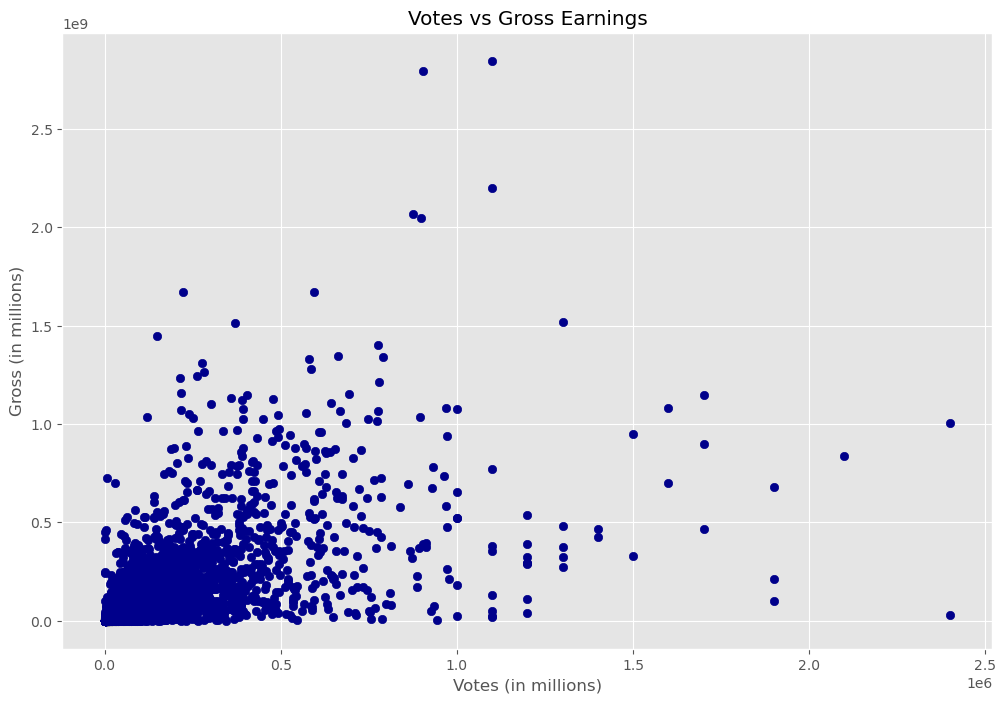

In [55]:
plt.scatter(x=df['votes'],y=df['gross'],color='darkblue')
plt.title('Votes vs Gross Earnings')
plt.xlabel('Votes (in millions)')
plt.ylabel('Gross (in millions)')
plt.show()

<Axes: xlabel='votes', ylabel='gross'>

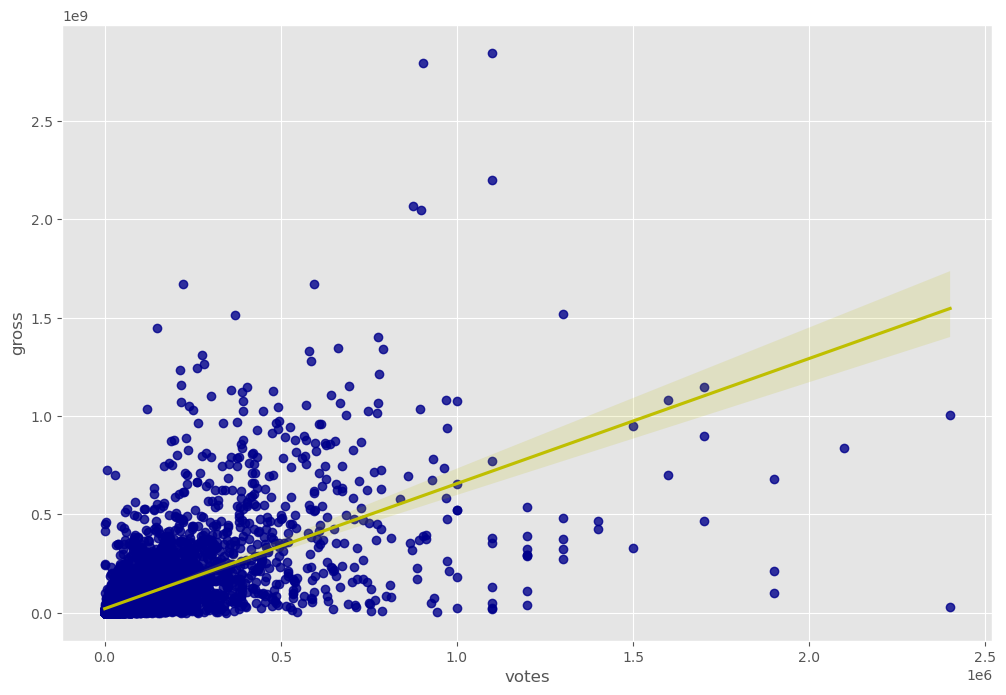

In [56]:
#plot votes vs gross using seaborn
sns.regplot(x='votes',y='gross',data=df,scatter_kws={'color':'darkblue'},line_kws={'color':'y'})

Budget and Votes have the highest correlation to gross earnings